In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'/Users/siddhantjain/Downloads/onlinefraud.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


# 1. Class Imbalance

In [4]:
# Count fraud vs non-fraud
fraud_count = df['isFraud'].value_counts()

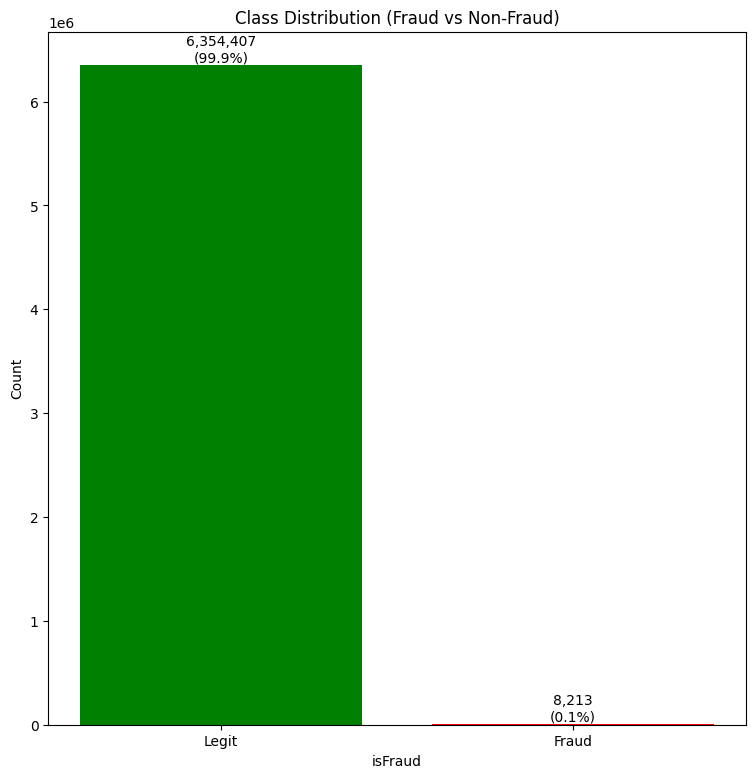

In [26]:
# Plot
plt.figure(figsize=(9, 9))
bars = plt.bar(fraud_count.index, fraud_count.values, color=['green', 'red'])
plt.title('Class Distribution (Fraud vs Non-Fraud)')
plt.xlabel('isFraud')
plt.ylabel('Count')
plt.xticks([0, 1], ['Legit', 'Fraud'], rotation=0)

# Add value labels automatically
total = sum(fraud_count.values)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:,}\n({height/total:.1%})',  # e.g., "8,000 (1.3%)"
             ha='center', va='bottom')

plt.show()

# 2. Transaction Type analysis

In [7]:
# Calculate fraud rate by type
fraud_rate = df.groupby('type')['isFraud'].mean().sort_values(ascending=False)

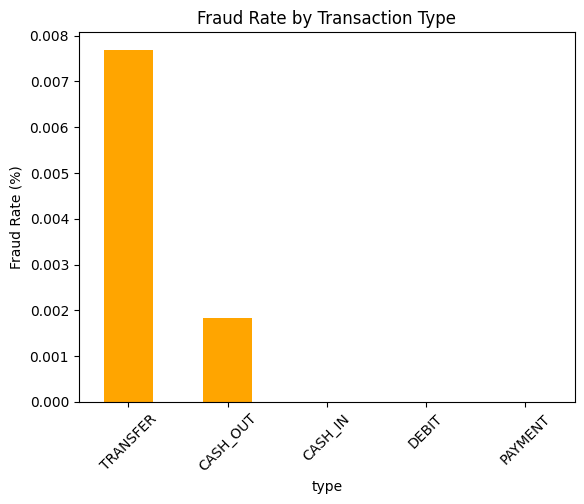

In [31]:
fraud_rate.plot(kind='bar', color='orange')
plt.title('Fraud Rate by Transaction Type')
plt.ylabel('Fraud Rate (%)')
plt.xticks(rotation=45)
plt.show()

# 3. Time Analysis

In [9]:
# Convert hours to days
df['day'] = df['step'] // 24

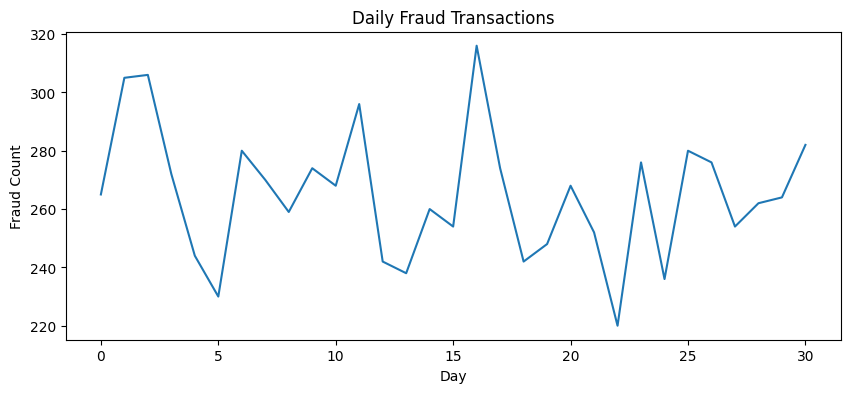

In [39]:
# Plot fraud cases over time
plt.figure(figsize=(10, 4))
df[df['isFraud'] == 1].groupby('day')['isFraud'].count().plot()
plt.title('Daily Fraud Transactions')
plt.xlabel('Day')
plt.ylabel('Fraud Count')
plt.show()

# 4. Amount Analysis

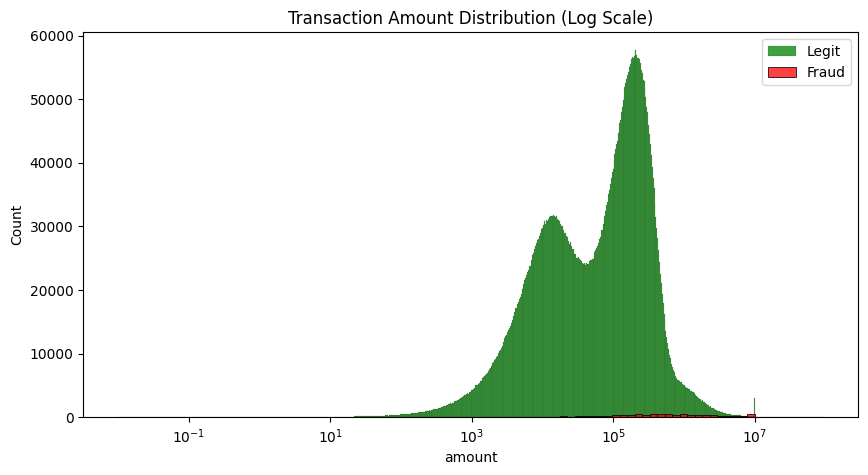

In [11]:
# Plot overlapping histograms (log scale)
plt.figure(figsize=(10, 5))
sns.histplot(df[df['isFraud'] == 0]['amount'], color='green', label='Legit', log_scale=True)
sns.histplot(df[df['isFraud'] == 1]['amount'], color='red', label='Fraud', log_scale=True)
plt.title('Transaction Amount Distribution (Log Scale)')
plt.legend()
plt.show()

# 5. Origin/Destination Patterns

In [13]:
# Top 10 fraudulent destination accounts
top_fraud_dest = df[df['isFraud'] == 1]['nameDest'].value_counts().sort_values(ascending=False).head(10)

print("Top Fraudulent Destination Accounts:")
print(top_fraud_dest)

Top Fraudulent Destination Accounts:
nameDest
C1193568854    2
C1399829166    2
C1980653895    2
C1460854172    2
C964377943     2
C686334805     2
C1656842502    2
C967226405     2
C1780714769    2
C385133759     2
Name: count, dtype: int64


# 6. Balance Changes

In [15]:
# Flag transactions where origin balance doesn't match amount
df['balance_change_orig'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['balance_mismatch'] = abs(df['balance_change_orig'] - df['amount']) > 1e-9  # Handle floating-point errors

In [16]:
# Check fraud correlation with mismatches
mismatch_fraud_rate = df.groupby('balance_mismatch')['isFraud'].mean()
print(mismatch_fraud_rate)

balance_mismatch
False    0.006585
True     0.000013
Name: isFraud, dtype: float64
